## ПРОШУ ПРОЩЕНИЯ ЗА КОРЯВЫЙ КОД

P.S. Зато сама) Ну вообще "вдохновение" черпала отсюда https://habr.com/ru/post/273253/ 

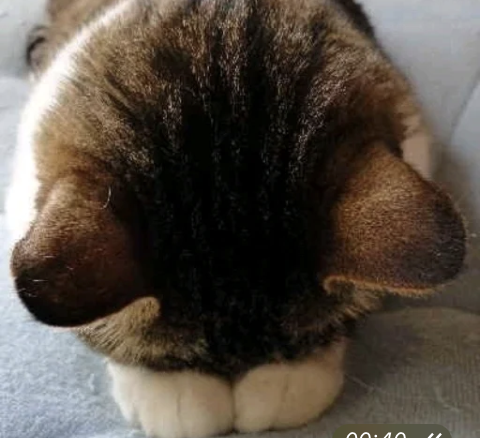

In [378]:
import numpy as np

import operator

In [431]:
operators = {'+': (1, operator.add),
             '-': (1, operator.sub), 
             '/': (2, operator.truediv),
             '*': (2, operator.mul),
             '~': (3, lambda x: -x)
            } # операторы

### 1 шагом считаем формулу, отделив цифры от символов и выделив унарные минусы)

In [505]:
def get_form(fm):
    """Функция парсинга формул из стринга"""
    
    num_set ={'1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '.'} # цифры и точка
    form = [] # тут будет список всех цифр в строке 
    number = [] # тут будут храниться и забываться цифры до первого символа

    for symb in fm:

        if symb in num_set: 
            number.append(symb) # пока не встретили символ запоминаем цифры 

        elif number: #чекнем, что не сразу символ
            form.append(float(''.join(number))) #записываем стрингу в флоат и добавляем к аутпуту 
            number = [] #забываем все цифры
            form.append(symb)
        
        else: 
            form.append(symb)
            
    if number:
        form.append(float(''.join(number))) #последнюю цифру записываем
        
    return form

In [540]:
def detect_unar_minus(formula):
    """Функция для выделения унарных минусов"""
    
    i = 0
    for elem in formula:

        #print(elem)
        if (elem == '-'):

            if (i == 0):
                formula[i] = '~'

            elif (list(formula)[i-1] == '('):
                formula[i] = '~'
        i += 1
    return formula

## 2 шагом используем алгоритм Дейкстры для считывания формулы в польской нотации

#### Алгоритм Дейкстры:
1. Проходим строку
2. Если число - сразу в аутпут
3. Оператор в стек
4. В аутпут все операторы до открывающейся скобки или конца стека порядком выше или равны томц, который сейчас рассматриваем. 
5. Открывающуюся скобку заносим в стек
6. Закрывающаяся скобка: удаляем из стека все до открыв скобки (в тч и ее), операторы пушим в аутпут

In [541]:
def polskaya(formula):
    """Алгоритм Дейкстры для получения польской формы, получается"""

    # исходя из алгоритма, есть два массива: стэк и выходной массив сo строкой в польской нотации
    stack = []
    out = []

    for element in formula: # шаг1 алгоритма
        # шаг 2 алгоритма
        if isinstance(element, float):
            out.append(element)

        else:
            stack.append(element) # шаг 3 и 5
            
        if element == ')': # шаг 6 
            i = -2
            
            while  stack[i] != '(': 
                out.append(stack[i])
                i -= 1

            stack = stack[:i] 
            
        if element in operators.keys(): 
            
            if (len(stack) != 1): # шаг 4

                if(stack[-2]!= '('):
                    i = -2

                    while (stack[i] != '('):

                        if(operators[element][0] <= \
                           operators[stack[i]][0]):
                            
                            out.append(stack[i])
                            stack.pop(i)

                        else:
                            i -= 1
                            
                        if (-i > len(stack)):
                            break
                            
    # внимание, костыль номер 10000
    if (len(stack) ==2):

        if(operators[stack[0]][0] < operators[stack[1]][0]):
            a = stack[0]
            stack[0] = stack[1]
            stack[1] = a
            out = out + stack
            
    elif (len(stack) > 0):
        out = out + stack
    
    return out

## 3 шаг - вычислим значение

In [545]:
def calc(formula):
    """Функция для вычисления значения выражения"""
    stack = []
        
    for elem in formula:

        if elem in operators.keys(): 

            if (elem == '~'):
                x = stack.pop()
                result = operators[elem][1](x)
            #удобство польской формы представления в том, 
            #что первый встретившийся знак применяется к 2м символам перед ним 
            else: 
                y, x = stack.pop(), stack.pop()
                result = operators[elem][1](x, y)

            # стэк - массив результатов и последний добавленный (первый по счету) - итоговый ответ
            stack.append(result) 

        else:

            stack.append(elem)

    return stack[0] # результат вычисления

## 4 шаг - ошибки
Источник: https://www.programiz.com/python-programming/user-defined-exception 

In [549]:
class Error(Exception):
    """Base class for other exceptions"""
    pass

class ZeroDivision(Error):
    """Raised when there is a zero division"""
    pass


class UnknownSymbol(Error):
    """Raised when the input value is too large"""
    pass

class Skobochki(Error):
    """Raised when the number of brackets doesn't match"""
    pass

# Вот сам калькулятор

In [554]:
while True:
    num_set ={'1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '.'} # цифры и точка
    
    try:
        formula = str(input("Enter a formula: "))
        
        if (formula.find('/0') != -1) and (formula.find('/0.') == -1):
            raise ZeroDivision
        
        for element in formula:
            if element not in ({'(', ')','+', '-', '*', '/'} | num_set):
                raise UnknownSymbol
                
        opens = formula.count('(')
        closes = formula.count(')')
        
        if (opens != closes):
            raise Skobochki
            
        break
        
        
        
    except ZeroDivision:
        print("Деление на ноль!")
        print()
    except UnknownSymbol:
        print("Неизестный символ")
        print()
        
    except Skobochki:
        print("Не хватает скобки")
        print()

formula1 = get_form(formula)
formula2 = detect_unar_minus(formula1)
formula3 = polskaya(formula2)
result = calc(formula3)        

print(result)

Enter a formula: -5+4
-1.0


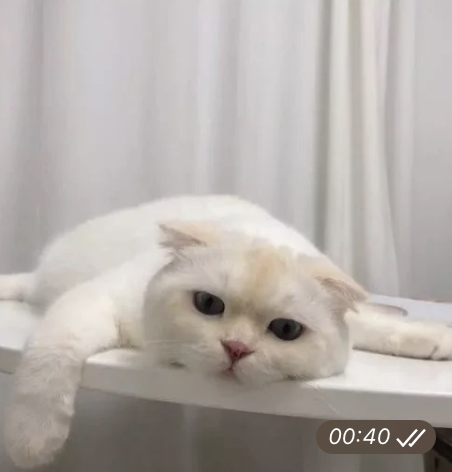